# **Simple Linear Regression** 

### Assumptions : 
1. Simple linear regression works only with 2 variables(one independent and another dependent variable), means only one input feature and corresponds to its output feature. 
2. Both variable should be numeric.

In [1]:
# Import libraries 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [2]:
# import IRIS data set from seaborn library 
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Checking data type
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [4]:
# Checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- Selecting 2 columns because it is simple linear regression 

In [5]:
X = df[['petal_width']]
y = df['sepal_width']

In [6]:
# Train model 
model = LinearRegression()
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


score() : It tells how well the regression line fits the training data not the test data.

- Returns R2_score for regression models and for classification models,returns accuracy.


In [7]:
# Check score on train data
model.score(X,y)  

0.13404819847567728

In [8]:
# Model slope and intercept
print(model.coef_)
print(model.intercept_)

[-0.20935983]
3.3084255580651947


**y = mx + c** 

where : <br/>
m = slope = model.coef_

c = intercept = model.intercept_

In [9]:
# Manual prediction using model slope and intercept 
(-0.20935983 * 1.4) + 3.3084255580651947 

3.015321796065195

In [10]:
# Model Prediction
print(model.predict([[1.4]]))

[3.01532179]


In [11]:
y_pred = model.predict(X)


In [12]:
print(f'R2_score : {r2_score(y, y_pred)}')
print(f'MSE : {mean_squared_error(y, y_pred)}')


R2_score : 0.13404819847567728
MSE : 0.1634162661041927


- Data is leaked(because we don't split the data into train and test set) but still, getting less R2_score and still getting some error(MSE), because model(line) is not fit to the data properly. 
- To reduce error we need to do EDA, Feature engineering and Feature Selection.
- Check -> which is model best for the data, according to distribution of data, so that model can fit to the data properly. 

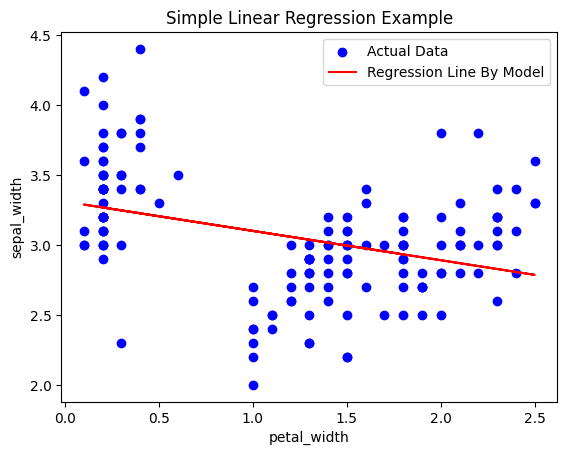

In [40]:
# Visualization (Graph)
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line By Model')
plt.xlabel('petal_width')
plt.ylabel('sepal_width')
plt.title('Simple Linear Regression Example')
plt.legend()
plt.show()

To understand **which model might work best *just by looking at the data*** (before training any model), you can follow some simple visual and logical checks.

I’ll explain it in a **very easy way**.

---

# ✅ **1. If the data looks like a straight line → Linear Regression**

If the relationship between **X and y** looks roughly like a line:

📈 Example:
As "experience" increases, "salary" also increases smoothly.

Then **Linear Regression** will work well.

### How to check:

* Plot a scatter plot:
  If points form a straight-ish pattern → linear.

---

# ✅ **2. If the data curves or bends → Polynomial / Non-linear models**

If the data shows curves:

* U-shape
* S-shape
* Wavy pattern

Then linear regression will fail.

Use:

* Polynomial Regression
* Decision Tree
* Random Forest
* SVR (RBF kernel)

---

# ✅ **3. If data has clear boundaries between groups → Classification**

If you see data separated into categories:

Example:

* Red and blue points forming groups

Use:

* Logistic Regression
* Decision Tree
* Random Forest
* SVM
* KNN

---

# ✅ **4. If data has many outliers → Tree-based models work better**

Outliers (extreme values) break linear regression.

Use:

* Decision Tree
* Random Forest
* XGBoost

Trees are more robust.

---

# ✅ **5. If there is no clear pattern → Use flexible models**

When scatter plot looks random and noisy:

Use:

* Random Forest
* Gradient Boosting
* SVM

These capture hidden patterns.

---

# ✅ **6. If the number of features is very high (50–5000) → Use Regularized Models**

Use:

* Lasso Regression
* Ridge Regression
* Logistic Regression (for classification)
* Linear SVM

These models prevent overfitting.

---

# 🧠 **Simple Intuition Method**

| Visual Pattern | Best Model                   |
| -------------- | ---------------------------- |
| Straight line  | Linear Regression            |
| Curve          | Polynomial, SVM (RBF), Trees |
| Many outliers  | Trees (RF, XGBoost)          |
| Clear groups   | Classification models        |
| No pattern     | Random Forest / SVM          |
| Many features  | Regularized models           |

---


To know **which machine learning model is better for your data**, you must compare them using **evaluation metrics**.
Here is a very **simple and practical way** to understand it:

---

# ✅ **Step-by-Step: How to Know Which Model Is Better**

## **1️⃣ Split your data**

Always split your dataset into:

```
train  (for training)
test   (for checking accuracy)
```

```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

---

# **2️⃣ Train different models**

Example:

```python
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
```

---

# **3️⃣ Compare them using proper metrics**

## ⭐ **If your problem is Regression (predicting numbers)**

Use metrics:

### ✔ **R² Score** (most commonly used)

* Closer to **1** → **better**
* Negative → bad model

### ✔ **MAE (Mean Absolute Error)**

* Lower value → better

### ✔ **MSE / RMSE**

* Lower value → better

Example:

```python
from sklearn.metrics import r2_score, mean_absolute_error

print("LR:", r2_score(y_test, lr.predict(X_test)))
print("DT:", r2_score(y_test, dt.predict(X_test)))
print("RF:", r2_score(y_test, rf.predict(X_test)))
```

**Whichever model has best score → use that model.**

---

## ⭐ **If your problem is Classification (predicting categories)**

Use:

### ✔ **Accuracy**

* Higher → better

### ✔ **Precision, Recall, F1-score**

* Higher → better
* Important for imbalanced data

### ✔ **Confusion Matrix**

* Shows correctly vs incorrectly classified samples

Example:

```python
from sklearn.metrics import accuracy_score

print("LR:", accuracy_score(y_test, lr.predict(X_test)))
print("DT:", accuracy_score(y_test, dt.predict(X_test)))
print("RF:", accuracy_score(y_test, rf.predict(X_test)))
```

---

# 🔥 **4️⃣ Use Cross-Validation (Best Method)**

It checks model performance on multiple splits of data.

```python
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(scores.mean())
```

Whichever model has **highest cross-validation accuracy** or **lowest error**, that model is best.

---

# 🔍 **5️⃣ Visual Check (Optional)**

For regression, plot **Actual vs Predicted** values.
More straight-line → better model.

---

# 🎯 **Summary**

| Problem Type   | Best Model Criteria         |
| -------------- | --------------------------- |
| Regression     | Highest R², Lowest MAE/MSE  |
| Classification | Highest Accuracy, F1-score  |
| Any            | Best cross-validation score |

---




If your **data follows a normal distribution**, it **does NOT decide the model directly** — it tells you that **linear models will likely work well**.

Here’s the simple logic 👇

---

# ✅ **If data is normally distributed → Use Linear Models**

Normal distribution usually means:

* The relationship between features and target is smooth
* Not too many outliers
* Variance is stable

This is perfect for **linear-based models**.

### ✔ Recommended Models:

1. **Linear Regression** (for regression tasks)
2. **Logistic Regression** (for classification tasks)
3. **Linear SVM**
4. **LDA (Linear Discriminant Analysis)**
5. **Naive Bayes (Gaussian NB)** — designed for normally distributed data
6. **Linear models with regularization**

   * Ridge Regression
   * Lasso Regression
   * ElasticNet

---

# 🎯 **Best match for normal distribution**

### ⭐ **Gaussian Naive Bayes**

Because it **assumes normal distribution** for features.
If your feature columns look normal → this model works very well.

---

# 📘 **Regression case**

If your target variable or errors (residuals) are normally distributed → linear regression is ideal.

So use:

✔ Linear Regression
✔ Ridge
✔ Lasso

---

# 📘 **Classification case**

If each class’s data is normally distributed → use:

✔ Logistic Regression
✔ Linear Discriminant Analysis (LDA)
✔ Gaussian Naive Bayes

---

# ❗ Important Clarification

Just because your **data is normal**, it doesn't force a specific model.

It only means:

* The relationship is likely linear
* Linear models will be stable and perform well
* You don’t need complex models like Random Forest or XGBoost

---

# ⭐ Final Summary

| Data Condition      | Best Models                                                       |
| ------------------- | ----------------------------------------------------------------- |
| Normal distribution | Linear Regression, Logistic Regression, LDA, Gaussian Naive Bayes |
| Slightly curved     | Polynomial Regression                                             |
| Complex patterns    | Random Forest, XGBoost                                            |
| Many outliers       | Tree-based models                                                 |

---




<Axes: ylabel='Count'>

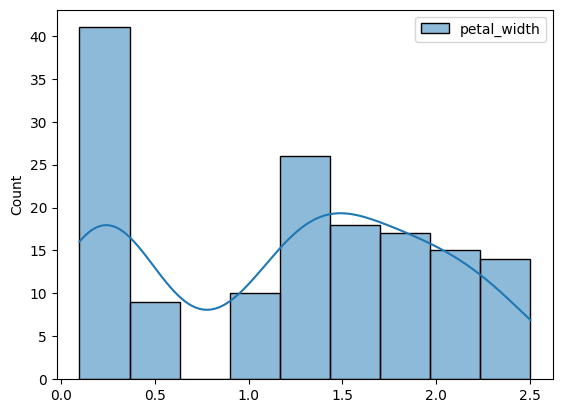

In [14]:
sns.histplot(X, kde= True)

<Axes: xlabel='sepal_width', ylabel='Count'>

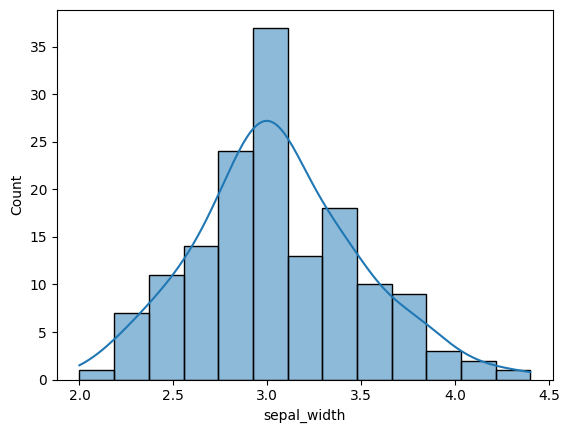

In [15]:
sns.histplot(y, kde = True)



---

# ✅ **If the target variable is normally distributed but the independent variable is NOT:**

👉 **You can still use Linear Regression.**

Because:

# ⭐ **Linear Regression does NOT require the independent variables (X) to be normally distributed.**

Only these need to be normal (or close to normal):

### ✔ Residuals (errors)

### ✔ For some tests: the target variable (y)

---

# ❗ So what happens if X is not normal?

### **Nothing bad!**

Linear regression works fine even when X looks like this:

* Skewed
* Bimodal
* Exponential
* Not symmetric
* Contains categories

As long as the **relationship between X and y is roughly linear**, the model will perform well.

---

# 📌 **What matters?**

The MOST important condition:

### ✔ The relationship between X and y should be linear.

Not the distribution of X.

Even if X is weirdly shaped, if the scatter plot looks like a line → linear regression is perfect.

---

# ⭐ **Example**

Target (y) = house price → usually normal
Feature (X) = area → usually right-skewed

Still, linear regression works excellent, because relationship is linear.

---

# 🔍 **When do we worry about X being non-normal?**

When using models that **assume normality of features**, like:

* Linear Discriminant Analysis (LDA)
* Gaussian Naive Bayes
* Some statistical tests

But **not** Linear Regression.

---

# 🎯 **Final Answer**

| Condition                     | Can we use Linear Regression? |
| ----------------------------- | ----------------------------- |
| y is normal, X is not         | ✅ YES                         |
| X is normal, y is not         | ❌ Not ideal                   |
| Errors (residuals) are normal | ⭐ BEST CASE                   |

---

# 🧠 **What you must check instead of normal distribution**

For regression, check:

1. **Linearity** between X and y
2. **Residuals are normally distributed**
3. **Homoscedasticity** (constant variance)
4. **No extreme outliers**

If these are okay → Linear Regression is perfect.

---



<Axes: ylabel='Count'>

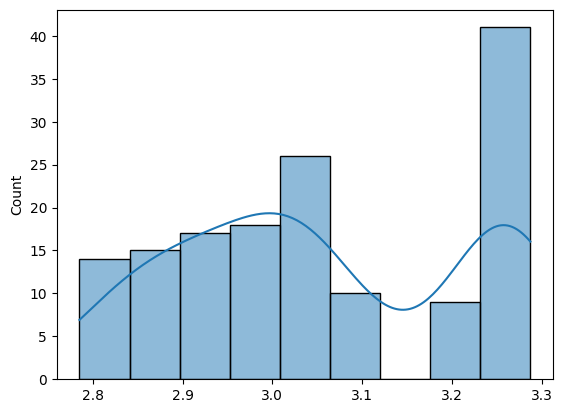

In [16]:
sns.histplot(y_pred, kde = True)

<Axes: xlabel='sepal_width', ylabel='Count'>

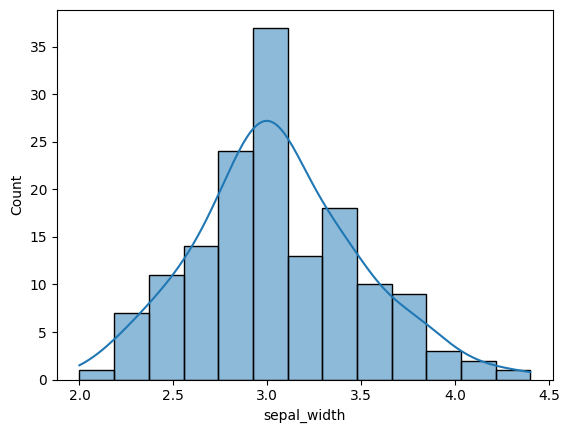

In [17]:
sns.histplot(y, kde = True)

In [18]:
res = y - y_pred

<Axes: xlabel='sepal_width', ylabel='Count'>

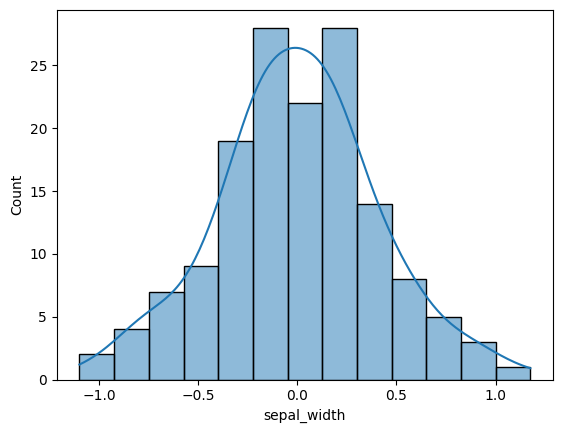

In [19]:
sns.histplot(res, kde = True)

In [20]:
# Split data into train and test set
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
# Create 2nd model with train data only 
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
# Model slope and intercept 
print(model_2.coef_)
print(model_2.intercept_)

[-0.22059988]
3.3227098594337754


In [23]:
# Model prediction manually 
(-0.220599884 * 1.4) + 3.3227098594337754

3.0138700218337755

In [24]:
# Model Prediction
print(model_2.predict([[1.4]]))

[3.01387003]


In [25]:
# Model prediction on test data 
y_pred = model.predict(X_test)

<Axes: >

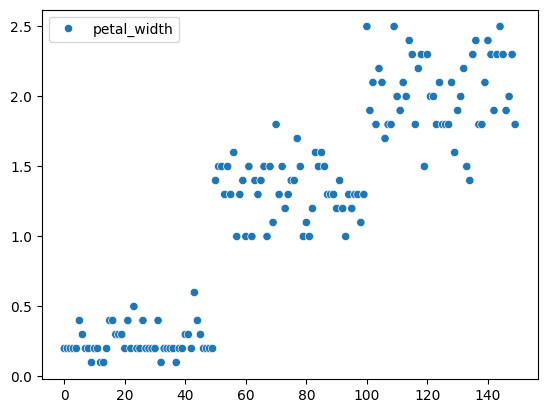

In [26]:
# Visualizationo (Graph) of 'X' data 
sns.scatterplot(X)

<Axes: >

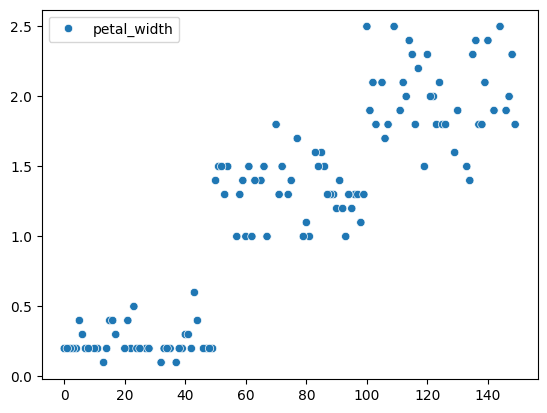

In [27]:
# Visualizationo (Graph) of 'X_train' data 
sns.scatterplot(X_train)

<Axes: ylabel='sepal_width'>

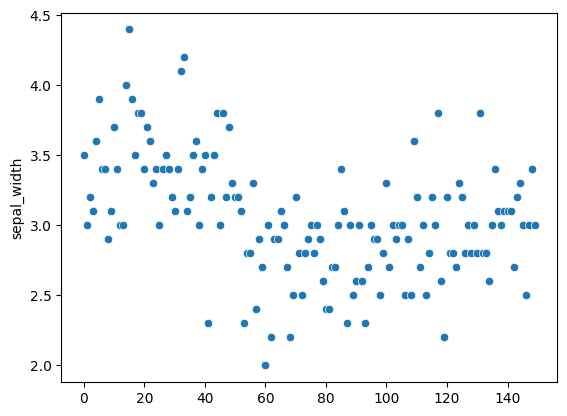

In [28]:
# Visualizationo (Graph) of 'y' data 
sns.scatterplot(y)

<Axes: ylabel='sepal_width'>

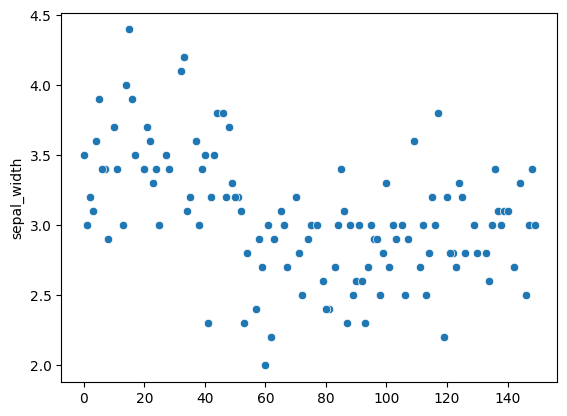

In [29]:
# Visualizationo (Graph) of 'y_train' data 
sns.scatterplot(y_train)

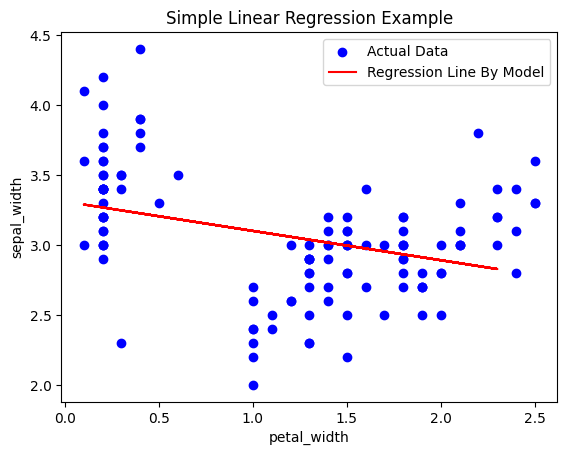

In [39]:
# Visualization (Graph) of model fitting to data
plt.scatter(X_train, y_train, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line By Model')
plt.xlabel('petal_width')
plt.ylabel('sepal_width')
plt.title('Simple Linear Regression Example')
plt.legend()
plt.show()

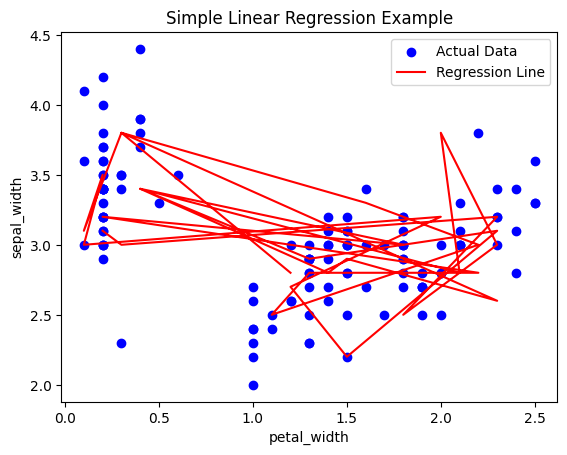

In [31]:
# Visualization (Graph) of model fitting to data
plt.scatter(X_train, y_train, color='blue', label='Actual Data')
plt.plot(X_test, y_test, color='red', label='Regression Line')
plt.xlabel('petal_width')
plt.ylabel('sepal_width')
plt.title('Simple Linear Regression Example')
plt.legend()
plt.show()

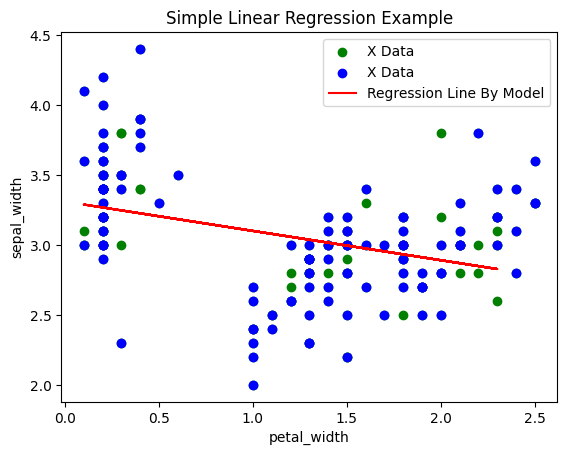

In [38]:
# Visualization (Graph) of 'X', 'y' data and 'X_train', 'y_train' Data 
plt.scatter(X, y, color = 'green', label = 'X Data')
plt.scatter(X_train, y_train, color = 'blue', label = 'X Data')  # 'X_train and y_train' data is overlaping 'X and y' Data
plt.plot(X_test, y_pred, color='red', label='Regression Line By Model')
plt.xlabel('petal_width')
plt.ylabel('sepal_width')
plt.title('Simple Linear Regression Example')
plt.legend()
plt.show()

In [48]:
# Performace Metrices 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

print(f'R2_score : {r2_score(y_test, y_pred)}')
print(f'MSE : {mean_squared_error(y_test, y_pred)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE : {mean_absolute_error(y_test, y_pred)}')
print(f'MAE_Percentage : {mean_absolute_percentage_error(y_test, y_pred)}')

R2_score : 0.11986776120439979
MSE : 0.12591758563035718
RMSE : 0.35484867990505076
MAE : 0.2892596839498035
MAE_Percentage : 0.09681832544444975
